In [3]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch

In [26]:
class NoamScheduler:
    def __init__(self, optimizer, d_model, warmup_steps=4000):
        self.optimizer = optimizer
        self.d_model = d_model
        self.warmup_steps = warmup_steps
        self.current_step = 0
        self.max_lr = 0
        self.max_step = 0

    def step(self):
        self.current_step += 1
        lr = self.learning_rate()
        if lr > self.max_lr:
            self.max_lr = lr
            self.max_step = self.current_step
        for param_group in self.optimizer.param_groups:
            # if param_group['lr'] != lr and self.current_step > 3000 and self.current_step < 5000:
            #     print(f"{self.current_step}: {param_group['lr']} -> {lr}")
            param_group['lr'] = lr

    def learning_rate(self):
        arg1 = self.current_step ** -0.5
        arg2 = min(self.current_step * self.warmup_steps ** -1.5, 1)
        return (self.d_model ** -0.5) * min(arg1, arg2)

Max LR: 0.000570544330734548 @ step 4000


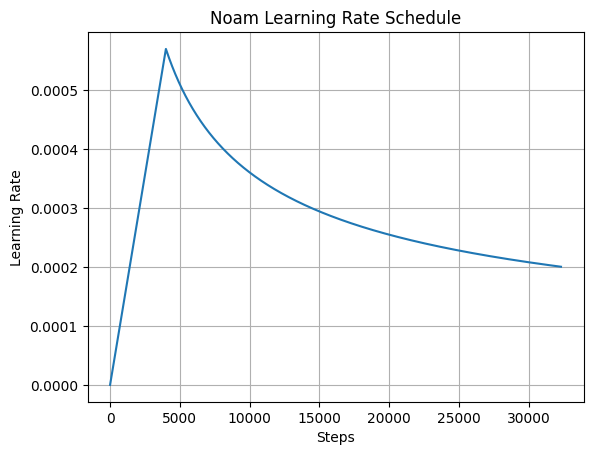

In [27]:
# Create a dummy optimizer (e.g., Adam) with a dummy model parameter
dummy_param = torch.nn.Parameter(torch.zeros(1))
optimizer = optim.Adam([dummy_param], lr=0.0)

# Create a NoamScheduler instance
d_model = 768
warmup_steps = 4000
scheduler = NoamScheduler(optimizer, d_model, warmup_steps)

# Set the number of training steps and initialize the arrays to store steps and learning rates
num_steps = 323*100
steps = []
learning_rates = []

# Iterate over the training steps, updating and storing the learning rate at each step
for step in range(1, num_steps + 1):
    scheduler.step()
    lr = scheduler.learning_rate()
    steps.append(step)
    learning_rates.append(lr)

print(f'Max LR: {scheduler.max_lr} @ step {scheduler.max_step}')

# Plot the learning rate schedule
plt.plot(steps, learning_rates)
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.title('Noam Learning Rate Schedule')
plt.grid()
plt.show()

In [28]:
4000/323


12.38390092879257

In [31]:
full = 100
full_range = range(10, 100)

for i in full_range:
    print(i)
    if i == full - 1:
        print(f'{i} == {full - 1}')

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
99 == 99
